In [19]:
from typing import (TypedDict)
class PortfolioState(TypedDict):
    amount_usd: float
    total_usd: float
    total_inr: float
    

In [20]:
def calc_total(state: PortfolioState) -> PortfolioState:
    """
    Add the interest to the total amount in USD.
    """
    state['total_usd'] = state['amount_usd'] * 1.08 
    return state

def convert_to_inr(state: PortfolioState) -> PortfolioState:
    """
    Convert the total amount in USD to INR.
    """
    state['total_inr'] = state['total_usd'] * 85.0
    return state

In [21]:
from langgraph.graph import StateGraph, START, END

builder = StateGraph(PortfolioState)

builder.add_node("Calc_total_node",calc_total)
builder.add_node("Calc_total_inr_node",convert_to_inr)

builder.add_edge(START, "Calc_total_node")
builder.add_edge("Calc_total_node", "Calc_total_inr_node")
builder.add_edge("Calc_total_inr_node", END)

graph = builder.compile()


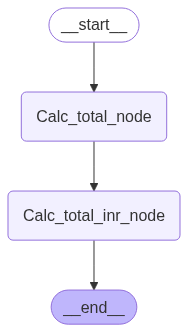

In [22]:
from IPython.display import display, Image

display(Image(graph.get_graph().draw_mermaid_png()))

In [23]:
graph.invoke({"amount_usd": 1000.0})

{'amount_usd': 1000.0, 'total_usd': 1080.0, 'total_inr': 91800.0}